In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv(
    '/Users/jhyunwoo/Documents/Programing/tensorflow-study/080263-master/chap2/data/car_evaluation.csv', names=cols, header=None)


<AxesSubplot:ylabel='output'>

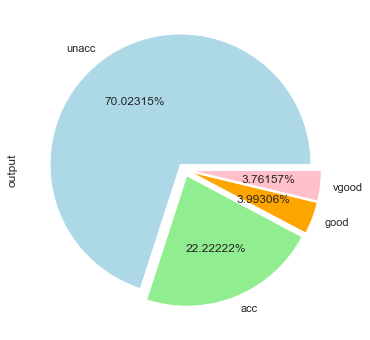

In [3]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

In [4]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
y = labels.values


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model 

input_layer = Input(shape=(X.shape[1],))

dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-01-17 13:55:13.886599: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-17 13:55:13.887198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 15)                330       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


2022-01-17 13:55:14.208025: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-17 13:55:14.349408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - 1s 8ms/step - loss: 0.8912 - acc: 0.6968 - val_loss: 0.7785 - val_acc: 0.6570
Epoch 2/50
  1/139 [..............................] - ETA: 0s - loss: 0.5267 - acc: 0.7500

2022-01-17 13:55:15.387598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - 1s 8ms/step - loss: 0.5979 - acc: 0.7321 - val_loss: 0.6503 - val_acc: 0.7148
Epoch 3/50
139/139 [==============================] - 1s 8ms/step - loss: 0.4813 - acc: 0.7910 - val_loss: 0.5399 - val_acc: 0.7870
Epoch 4/50
139/139 [==============================] - 1s 9ms/step - loss: 0.3940 - acc: 0.8398 - val_loss: 0.4789 - val_acc: 0.8267
Epoch 5/50
139/139 [==============================] - 1s 8ms/step - loss: 0.3429 - acc: 0.8751 - val_loss: 0.4346 - val_acc: 0.8412
Epoch 6/50
139/139 [==============================] - 1s 8ms/step - loss: 0.3081 - acc: 0.8869 - val_loss: 0.4036 - val_acc: 0.8231
Epoch 7/50
139/139 [==============================] - 1s 8ms/step - loss: 0.2802 - acc: 0.8905 - val_loss: 0.3708 - val_acc: 0.8484
Epoch 8/50
139/139 [==============================] - 1s 8ms/step - loss: 0.2562 - acc: 0.8986 - val_loss: 0.3475 - val_acc: 0.8412
Epoch 9/50
139/139 [==============================] - 1s 8ms/step - loss: 0.2350 - acc:

In [8]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 8ms/step - loss: 0.1127 - acc: 0.9624
Test Score: 0.11274689435958862
Test Accuracy: 0.9624277353286743
